In [1]:
import numpy as np
import sqlite3 as db
import pandas as pd
from lsst.sims.utils import angularSeparation
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Define a point to look around
ra = 20
dec = -40

radius = 1.75
filter_colors = {'u': 'purple', 'g': 'blue', 'r': 'green', 'i': 'cyan', 'z': 'orange', 'y': 'red'}

In [3]:
filenames = ['baseline_1exp_pairsmix_10yrs.db', 'roll_mod3_sdf0.10mixed_10yrs.db', 'very_alt3_rm5illum15_10yrs.db']
#filenames = ['baseline_1exp_pairsmix_10yrs.db']

baseline_1exp_pairsmix_10yrs.db 956


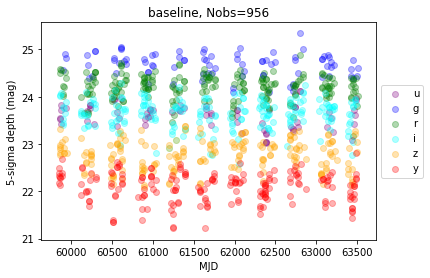

In [4]:
for i,filename in enumerate(filenames):
    conn = db.connect(filename)
    df = pd.read_sql('select * from summaryallprops;', conn)
    
    ang_dist = angularSeparation(df['fieldRA'].values, df['fieldDec'].values, ra, dec)
    overlapping = np.where(ang_dist < radius)[0]
    df_sub = df.iloc[overlapping, :]
    fig, ax = plt.subplots()
    for filtername in filter_colors:
        infilt = np.where(df_sub['filter'].values == filtername)
        ax.scatter(df_sub['observationStartMJD'].values[infilt],
                   df_sub['fiveSigmaDepth'].values[infilt],
                   c=filter_colors[filtername], label=filtername, alpha=0.3)
    title = filename.split('_')[0] + ', Nobs=%i' % df_sub.shape[0]
    ax.set(xlabel='MJD', ylabel='5-sigma depth (mag)', title=title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    print(filename, df_sub.shape[0])
    fig.savefig('%i.pdf' % i)
    conn.close()
    # let's write the subset out to a database
    conn = db.connect('sub_'+filename)
    df_sub.to_sql('SummaryAllProps', conn, index=False)
    conn.close()

In [5]:
# What do we see in this plot. Looks like 11 seasons (the survey probably starts part way through the 
# first season, and last one is cut off)

In [6]:
df_sub

,observationId,fieldRA,fieldDec,observationStartMJD,flush_by_mjd,visitExposureTime,filter,rotSkyPos,numExposures,airmass,...,rotTelPos,moonAz,sunAz,sunRA,sunDec,moonRA,moonDec,moonDistance,solarElong,moonPhase
1510,1510,18.268375,-40.743953,59856.118748,59856.146246,30.0,y,277.886253,1,1.142289,...,2.765944,264.444788,219.283965,3.310961,-0.072937,297.486160,-25.748219,66.868114,134.397476,57.802875
1527,1527,21.092426,-38.485803,59856.125967,59856.161471,30.0,y,276.163385,1,1.140428,...,0.244998,263.405755,215.959095,3.311075,-0.072985,297.571017,-25.719296,69.535031,136.049997,57.843797
1573,1573,18.268375,-40.743953,59856.146011,59856.176851,30.0,y,288.880042,1,1.076529,...,2.569327,260.737548,205.604372,3.311393,-0.073120,297.813961,-25.636193,66.693016,134.390978,57.961401
1594,1594,21.092426,-38.485803,59856.155030,59856.176851,30.0,y,280.894847,1,1.068906,...,5.601861,259.603732,200.529137,3.311536,-0.073181,297.926965,-25.597600,69.336404,136.044913,58.016301
6238,6238,21.728641,-40.129543,59861.236892,59861.269601,30.0,y,40.792647,1,1.027181,...,4.104039,319.017905,152.159072,3.392418,-0.107178,7.816641,0.706426,42.763879,133.235359,95.275818
6271,6271,21.728641,-40.129543,59861.250882,59861.285082,30.0,y,55.723743,1,1.041494,...,1.665748,312.913698,145.366412,3.392642,-0.107271,7.922692,0.795579,42.821143,133.231799,95.345441
6318,6318,21.728641,-40.129543,59861.271246,59861.300226,30.0,y,65.717374,1,1.073059,...,3.818977,305.380313,136.691878,3.392967,-0.107406,8.082491,0.924956,42.903219,133.226611,95.448956
7204,7204,17.855950,-39.595015,59862.261029,59862.285564,30.0,z,66.458870,1,1.078064,...,5.843617,327.704449,141.094962,3.408811,-0.113963,20.268891,7.151124,46.799446,133.815389,97.243252
7205,7205,21.182602,-40.847941,59862.261444,59862.285564,30.0,z,57.229255,1,1.065092,...,7.686482,327.518143,140.919787,3.408817,-0.113965,20.271920,7.153561,48.008811,132.316043,97.241651
7249,7249,21.182602,-40.847941,59862.280367,59862.301742,30.0,z,67.002065,1,1.103133,...,6.776070,319.504997,133.446374,3.409120,-0.114091,20.412271,7.263957,48.117117,132.310717,97.167064


Text(0, 0.5, 'airmass')

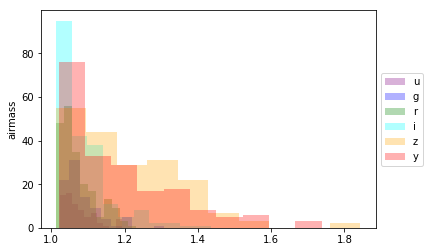

In [7]:
fig, ax = plt.subplots()
for filtername in filter_colors:
    infilt = np.where(df_sub['filter'].values == filtername)
    ack = ax.hist(df_sub['airmass'].values[infilt], color=filter_colors[filtername], alpha=.3, label=filtername) 
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('airmass')

Text(0.5, 1.0, 'Field Centers')

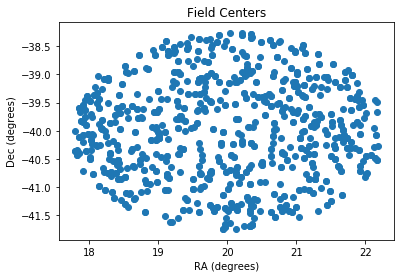

In [8]:
plt.scatter(df_sub['fieldRA'], df_sub['fieldDec'])
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.title('Field Centers')